# 🚧 Data Cleaning Notebook

This notebook documents the cleaning and preprocessing of the raw car supply chain dataset in preparation for modeling.
This notebook performs complete data cleaning on raw car parts shipment data. Key steps include missing value imputation, outlier treatment, type conversions, and saving a clean dataset ready for analysis.
## 🎯 Objective:
Ensure the dataset is:
- Free of duplicates
- Clean of missing or inconsistent values
- Properly formatted and standardized for machine learning

> This step is critical to ensure trustworthy model results in later stages.


## 🔍 Initial Dataset Overview

- Load the dataset
- View first few rows
- Check data types
- Identify numeric vs categorical columns
- Count total records


In [ ]:
# Optional: install these if running in new environment
# !pip install pandas numpy matplotlib seaborn


#Importing Necessary Libraries
import pandas as pd                       # for data analysis and manipulation
import numpy as np                        # for mathematical and statistical analysis
import seaborn as sns                     # for visualizations
import matplotlib.pyplot as plt           # for basic visualizations

## 1. Load and Inspect Dataset

In [ ]:
# Load dataset from CSV file
file_path = "Car_Automated_Supply_Chain (1).csv"
df = pd.read_csv(file_path)
# Show first 5 rows to understand structure
df.head()

,Car_ID,Scheduled_Assembly_Date,Engine_Delivery_Date,Engine_Supplier_Region,Engine_Supplier_Reliability,Engine_Transport_Mode,Is_Critical_Engine,Transmission_Delivery_Date,Transmission_Supplier_Region,Transmission_Supplier_Reliability,...,Transmission_Supplier_Group,Brake_System_Supplier_Group,Suspension_Supplier_Group,Infotainment_Supplier_Group,Engine_Reliability_Score,Transmission_Reliability_Score,Brake_System_Reliability_Score,Suspension_Reliability_Score,Infotainment_Reliability_Score,Traffic_Severity_Index
0,CAR_942,2023-01-31,2023-01-24,East,0.76,Road,1,2023-01-30,North,0.79,...,North_Road,South_Sea,East_Sea,North_Road,0.302632,0.329114,0.282609,0.239130,0.310345,1.0
1,CAR_546,2023-01-31,2023-01-22,North,0.75,Sea,1,2023-01-24,East,0.98,...,East_Air,East_Sea,North_Air,West_Sea,0.289474,0.328571,0.230769,0.311688,0.400000,1.0
2,CAR_465,2023-01-31,2023-01-29,West,0.74,Air,0,2023-01-28,East,0.95,...,East_Air,East_Air,West_Road,East_Air,0.346154,0.328571,0.383562,0.356322,0.298851,1.0
3,CAR_807,2023-01-31,2023-02-05,East,0.85,Road,0,2023-02-03,East,0.92,...,East_Road,North_Sea,West_Air,North_Road,0.302632,0.279070,0.273810,0.321839,0.310345,1.5
4,CAR_286,2023-01-31,2023-01-28,South,0.79,Air,0,2023-01-31,South,0.79,...,NaN,North_Air,South_Road,West_Sea,0.270270,NaN,0.260274,0.224490,0.400000,1.0


In [ ]:
df.columns = df.columns.str.strip()  # remove accidental spaces

## Dataset Dimensions

We examine the size of the dataset:

- **Total Records (1010):** Measures how many observations are available.
- **Total Features (65):** Indicates the complexity and richness of the data.

This gives a quick understanding of the scale of our analysis.


In [ ]:
# Check dataset shape (rows, columns)
df.shape

(1010, 65)

## Column Classification

We now classify the features into numeric and categorical types. This step ensures we apply the correct transformations during cleaning, encoding, and modeling.

- **Numeric Columns:** Used for statistical imputation, outlier detection, and scaling.
- **Categorical Columns:** May require standardization, encoding, and category grouping.

This also helps in building pipelines later.


## 2. Identify Numeric and Categorical Columns

In [ ]:
# Getting numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Getting categorical columns (object type or category)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Displaying the columns
print("Numeric Columns:")
print(numeric_cols)

print("\nCategorical Columns:")
print(categorical_cols)

Numeric Columns:
['Engine_Supplier_Reliability', 'Is_Critical_Engine', 'Transmission_Supplier_Reliability', 'Is_Critical_Transmission', 'Brake_System_Supplier_Reliability', 'Is_Critical_Brake_System', 'Suspension_Supplier_Reliability', 'Is_Critical_Suspension', 'Infotainment_Supplier_Reliability', 'Is_Critical_Infotainment', 'Car_Delayed', 'Delay_Days', 'Financial_Impact_USD', 'Engine_Delayed_Flag', 'Transmission_Delayed_Flag', 'Brake_System_Delayed_Flag', 'Suspension_Delayed_Flag', 'Infotainment_Delayed_Flag', 'Any_Critical_Part_Delayed', 'Holiday_Proximity', 'Inventory_Buffer_Used', 'Strike_Notice', 'Total_Parts_Delayed', 'Distance_KM', 'Supplier_Performance_Score', 'Contract_Penalty_Per_Day', 'Engine_Reliability_Score', 'Transmission_Reliability_Score', 'Brake_System_Reliability_Score', 'Suspension_Reliability_Score', 'Infotainment_Reliability_Score', 'Traffic_Severity_Index']

Categorical Columns:
['Car_ID', 'Scheduled_Assembly_Date', 'Engine_Delivery_Date', 'Engine_Supplier_Region

## 3. Data Type Conversion

In [ ]:
#checking the data types
print("\nCurrent Data Types:")
print(df.dtypes)


Current Data Types:
Car_ID                                    object
Scheduled_Assembly_Date           datetime64[ns]
Engine_Delivery_Date              datetime64[ns]
Engine_Supplier_Region                    object
Engine_Supplier_Reliability              float64
                                       ...      
Transmission_Reliability_Score           float64
Brake_System_Reliability_Score           float64
Suspension_Reliability_Score             float64
Infotainment_Reliability_Score           float64
Traffic_Severity_Index                   float64
Length: 65, dtype: object


## Column Type Assessment

Upon reviewing the dataset’s column types, several issues were identified that may affect downstream analysis:

### Misclassified Column Types

| Column | Current Type | Issue | Suggested Fix |
|--------|--------------|-------|----------------|
| `Scheduled_Assembly_Date` | `object` | Should be a date | Convert to `datetime` |
| `Engine_Delivery_Date` | `object` | Should be a date | Convert to `datetime` |
| `Transmission_Delivery_Date` | `object` | Should be a date | Convert to `datetime` |
| `Brake_System_Delivery_Date` | `object` | Should be a date | Convert to `datetime` |
| `Suspension_Delivery_Date` | `object` | Should be a date | Convert to `datetime` |
| `Infotainment_Delivery_Date` | `object` | Should be a date | Convert to `datetime` |
| `Car_ID` | `object` | Likely an ID, not useful as categorical | Keeping as string  |
| `Valid_Delay` | `bool` | Correctly identified | No action needed |
| `Engine_Delay_Reason`, etc. | `object` | Should be categorical | Convert to `category` |
| `Order_Urgency`, `Weather_Condition_On_Delivery`, `Production_Shift` | `object` | Categorical in nature | Convert to `category` |
`Transmission_Supplier_Group`    | `object`     | Supplier group providing transmission parts. Useful for grouping suppliers by region/type.    | Keep as `category`      |
| `Brake_System_Supplier_Group`    | `object`     | Supplier group responsible for brake system parts. Helps track supplier-related delays.       | Keep as `category`      |
| `Suspension_Supplier_Group`      | `object`     | Supplier group delivering suspension parts. Important for delay and reliability analysis.     | Keep as `category`      |
| `Infotainment_Supplier_Group`    | `object`     | Supplier group providing infotainment parts (audio, screens, etc.).                           | Keep as `category`      |
| `Engine_Reliability_Score`       | `float`      | Numeric score representing reliability of engine supplier based on past performance.          | Keep as `float`         |
| `Transmission_Reliability_Score` | `float`      | Numeric score representing reliability of transmission supplier.                              | Keep as `float`         |
| `Brake_System_Reliability_Score` | `float`      | Numeric score for reliability of brake system supplier.                                       | Keep as `float`         |
| `Suspension_Reliability_Score`   | `float`      | Numeric score for reliability of suspension supplier.                                         | Keep as `float`         |
| `Infotainment_Reliability_Score` | `float`      | Numeric score for reliability of infotainment supplier.                                       | Keep as `float`         |
| `Traffic_Severity_Index`          | `float` | Numeric index indicating severity of traffic conditions during delivery. Higher means worse.  | Keep as `float`         |

### Why This Matters

- **Date columns** must be in `datetime` format to compute delivery gaps, time-based features, etc.
- **Categorical conversion** allows memory optimization and easier encoding during modeling.
- **Misclassified types** can break or distort EDA, visualizations, or ML preprocessing pipelines.
- **Supplier group columns** are categorical and help analyze supplier-specific delays or issues.  
- **Reliability scores** are numerical and help quantify supplier performance over time.  
- **Traffic severity** is an external numeric factor impacting delivery times, important for modeling delays.  

This column type correction will be the first cleaning step before feature engineering.


## Dataset Structure Summary

We use `df.info()` to get a concise summary of the dataset's structure — including row count, non-null values, and data types.

> Data types were already reviewed above, so here we focus mainly on identifying missing values and confirming column completeness.


In [ ]:
# checking basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 65 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Car_ID                             1010 non-null   object 
 1   Scheduled_Assembly_Date            1010 non-null   object 
 2   Engine_Delivery_Date               1010 non-null   object 
 3   Engine_Supplier_Region             980 non-null    object 
 4   Engine_Supplier_Reliability        1010 non-null   float64
 5   Engine_Transport_Mode              980 non-null    object 
 6   Is_Critical_Engine                 1010 non-null   int64  
 7   Transmission_Delivery_Date         1010 non-null   object 
 8   Transmission_Supplier_Region       980 non-null    object 
 9   Transmission_Supplier_Reliability  1010 non-null   float64
 10  Transmission_Transport_Mode        980 non-null    object 
 11  Is_Critical_Transmission           1010 non-null   int64

### Observations:

- Row Count: 1,010 rows confirmed.
- Missing values are visible in columns such as:
  - `Engine_Supplier_Region`, `Engine_Transport_Mode `,`Transmission_Transport_Mode`,`Transmission_Supplier_Region`, `Infotainment_Delay_Reason`, `Financial_Impact_USD`
  - `Engine_Delay_Reason`, `Suspension_Delay_Reason`, `Transmission_Delay_Reason`,`Financial_Impact_USD`,`Brake_System_Delay_Reason`,`Engine_Supplier_Group`,
 `Transmission_Supplier_Group`,`Brake_System_Supplier_Group`, `Engine_Reliability_Score`,`Transmission_Reliability_Score`,`Brake_System_Reliability_Score` etc.
-  These missing values will be addressed in the next section.

> Data types were discussed earlier using `df.dtypes`. Here, we emphasize data **completeness** to prepare for cleaning and imputation.


In [ ]:
#getting numerical numbers only
key_numeric = ['Delay_Days', 'Financial_Impact_USD', 'Engine_Supplier_Reliability',
               'Transmission_Supplier_Reliability', 'Brake_System_Supplier_Reliability',"Distance_KM",
               'Suspension_Supplier_Reliability', 'Infotainment_Supplier_Reliability', "Supplier_Performance_Score", "Contract_Penalty_Per_Day"]
# displaying the basic statistical information of numerical columns
df[key_numeric].describe()

,Delay_Days,Financial_Impact_USD,Engine_Supplier_Reliability,Transmission_Supplier_Reliability,Brake_System_Supplier_Reliability,Distance_KM,Suspension_Supplier_Reliability,Infotainment_Supplier_Reliability,Supplier_Performance_Score,Contract_Penalty_Per_Day
count,1010.000000,9.800000e+02,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,2.378218,3.877327e+05,0.842406,0.845851,0.844059,153.704991,0.845554,0.846020,0.523584,318.712871
std,3.065444,5.346090e+06,0.083258,0.084760,0.083860,126.082544,0.082745,0.082688,0.298901,265.773600
min,-10.000000,0.000000e+00,0.700000,0.700000,0.700000,10.289644,0.700000,0.700000,0.000000,100.000000
25%,0.000000,0.000000e+00,0.770000,0.770000,0.770000,59.853144,0.780000,0.772500,0.312500,100.000000
50%,2.000000,1.000000e+03,0.840000,0.840000,0.840000,102.316826,0.840000,0.850000,0.550000,250.000000
75%,4.000000,2.000000e+03,0.910000,0.920000,0.920000,199.234617,0.920000,0.920000,0.710000,500.000000
max,15.000000,7.500000e+07,0.990000,0.990000,0.990000,497.255305,0.990000,0.990000,1.940000,1000.000000


## Descriptive Statistics of Key Numeric Features

We perform summary statistics using `df.describe()` on selected core numeric columns relevant to delays and financial risk. These include:

- `Delay_Days`: Target for regression (shipping delay in days)
- `Financial_Impact_USD`: Financial loss due to delays
- Supplier reliability scores across all key systems

### Key Observations:

- **Delay_Days**:
  - Mean delay is 2.4 days, with a maximum of 15 days.
  - Minimum is **-10**, indicating **invalid values** (to be cleaned later).
  - 50% of cars were delayed **≤ 2 days**, and 75% **≤ 4 days** — a right-skewed distribution.

- **Financial_Impact_USD**:
  - Shows **extreme variance**: median is \$1,000, but the max is \$75,000,000.
  - Indicates presence of **severe outliers**, which could skew models.
  - 25% of cases had no financial loss at all (0.0).

- **Supplier Reliability (All Systems)**:
  - Range: 0.70 to 0.99 across all parts — high reliability overall.
  - Median values are consistent across components (0.84–0.85).
  - These features are likely strong predictors for delay risk.

> These observations will guide both our **outlier treatment strategy** and **feature engineering decisions** in the upcoming sections.


## Step 4 Checking and Handling Duplicated Values

In [ ]:
# checking duplicated rows
df.duplicated().sum()

np.int64(0)

##Step 5: Converting Data types into correct format

In [ ]:
# Convert delivery date columns to datetime type for accurate date calculations
date_columns=["Scheduled_Assembly_Date", "Engine_Delivery_Date",	"Transmission_Delivery_Date","Brake_System_Delivery_Date","Suspension_Delivery_Date","Infotainment_Delivery_Date"]
for col in date_columns:
  df[col]= pd.to_datetime(df[col])

In [ ]:
# Displaying the datatypes
df.dtypes

,0
Car_ID,object
Scheduled_Assembly_Date,datetime64[ns]
Engine_Delivery_Date,datetime64[ns]
Engine_Supplier_Region,object
Engine_Supplier_Reliability,float64
...,...
Transmission_Reliability_Score,float64
Brake_System_Reliability_Score,float64
Suspension_Reliability_Score,float64
Infotainment_Reliability_Score,float64


##Step 6 : Handling Missing Values

In [ ]:
#checking the missing values present in the dataset
df.isnull().sum()

,0
Car_ID,0
Scheduled_Assembly_Date,0
Engine_Delivery_Date,0
Engine_Supplier_Region,30
Engine_Supplier_Reliability,0
...,...
Transmission_Reliability_Score,59
Brake_System_Reliability_Score,30
Suspension_Reliability_Score,0
Infotainment_Reliability_Score,0


/tmp/ipython-input-20-3559131431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette="Dark2")


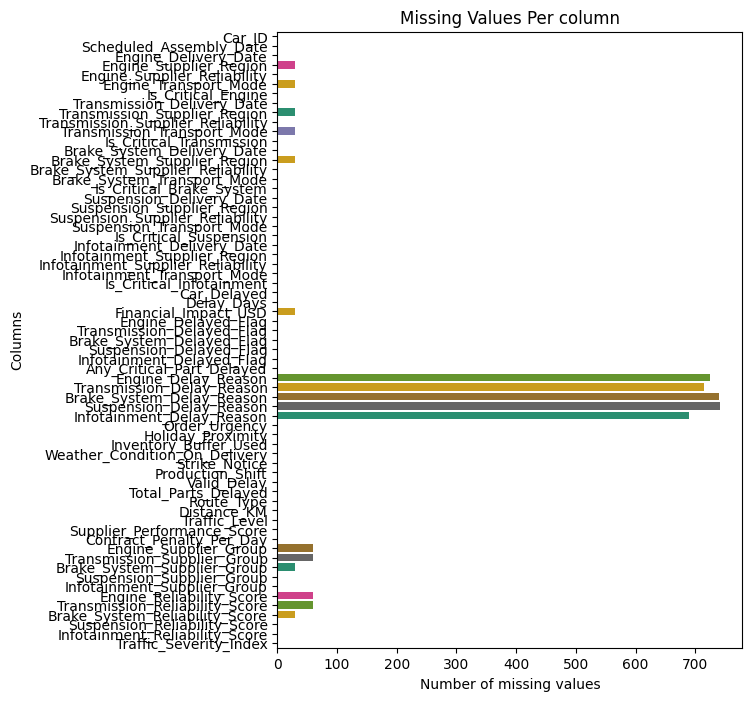

In [ ]:
# visually presenting missing values.
missing=df.isnull().sum()
missing_values= missing[missing>0]
plt.figure(figsize=(6,8))
sns.barplot(x=missing.values, y=missing.index, palette="Dark2")
plt.title("Missing Values Per column")
plt.xlabel("Number of missing values")
plt.ylabel("Columns")
plt.show()

## Step 7 Filling Missing Values


In [ ]:
# Investigate the distribution of delay flags where delay reasons are missing.
# For each delay reason column, we filter the rows with missing reasons (NaN)
# and then count how many of those rows correspond to delayed (flag=1) and non-delayed (flag=0) parts.
# This helps verify whether missing delay reasons mostly correspond to no delay or if there are unknown delays.
missing_reason = df[df['Engine_Delay_Reason'].isna()]
print(missing_reason["Engine_Delayed_Flag"].value_counts())

missing_reason=df[df["Transmission_Delay_Reason"].isna()]
print(missing_reason["Transmission_Delayed_Flag"].value_counts())

missing_reason=df[df["Brake_System_Delay_Reason"].isna()]
print(missing_reason["Brake_System_Delayed_Flag"].value_counts())

missing_reason=df[df["Suspension_Delay_Reason"].isna()]
print(missing_reason["Suspension_Delayed_Flag"].value_counts())

missing_reason=df[df["Infotainment_Delay_Reason"].isna()]
print(missing_reason["Infotainment_Delayed_Flag"].value_counts())

Engine_Delayed_Flag
0    717
1      8
Name: count, dtype: int64
Transmission_Delayed_Flag
0    706
1      8
Name: count, dtype: int64
Brake_System_Delayed_Flag
0    731
1      9
Name: count, dtype: int64
Suspension_Delayed_Flag
0    742
Name: count, dtype: int64
Infotainment_Delayed_Flag
0    690
Name: count, dtype: int64


In [ ]:
# Impute missing delay reasons based on the corresponding delay flags.
# For each delay reason column and its associated binary delay flag:
# - If the delay reason is missing (NaN) and the delay flag is 0 (no delay),
#   fill the reason as "On-Time" to indicate no delay occurred.
# - If the delay reason is missing but the delay flag is 1 (delay occurred),
#   fill the reason as "Unknown_Delayed" to denote a delay happened but the reason is unknown.
# This conditional imputation preserves data accuracy and enables meaningful analysis of delay reasons.
reason_columns=[("Engine_Delay_Reason","Engine_Delayed_Flag"),
                ("Transmission_Delay_Reason", "Transmission_Delayed_Flag"),
                ("Brake_System_Delay_Reason", "Brake_System_Delayed_Flag"),
                ("Suspension_Delay_Reason", "Suspension_Delayed_Flag"),
                ("Infotainment_Delay_Reason", "Infotainment_Delayed_Flag")]
for reason_col, flag_col in reason_columns:
  df.loc[(df[reason_col].isna())&(df[flag_col]==0),reason_col]="On-Time"
  df.loc[(df[reason_col].isna())&(df[flag_col]==1), reason_col]= "Unknown_Delayed"


### Summary of Missing Value Handling

- Missing delay reasons were filled based on corresponding delay flags:
  - If delayed flag = 0, reason set to "On-Time"
  - If delayed flag = 1, reason set to "Unknown_Delayed"
- Missing financial impact values were filled with median to reduce skew from outliers.
- Missing categorical supplier and transport mode fields were filled using the mode (most common category).

This ensures no missing values remain and all data is consistent for modeling.


In [ ]:
# Fill missing financial impact values with the median to reduce outlier influence
median=df["Financial_Impact_USD"].median()
df["Financial_Impact_USD"].fillna(median, inplace=True)
for col in ['Engine_Reliability_Score', 'Transmission_Reliability_Score', 'Brake_System_Reliability_Score']:
    median_value = df[col].median()  # median is often better for skewed data
    df[col].fillna(median_value, inplace=True)


/tmp/ipython-input-31-887653805.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Financial_Impact_USD"].fillna(median, inplace=True)
/tmp/ipython-input-31-887653805.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
# Fill missing categorical values with the most frequent value (mode)
categorical_cols=("Brake_System_Supplier_Region", "Transmission_Transport_Mode", "Transmission_Supplier_Region", "Engine_Transport_Mode", "Engine_Supplier_Region",'Engine_Supplier_Group', 'Transmission_Supplier_Group', 'Brake_System_Supplier_Group')
for col in categorical_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-32-2530631501.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


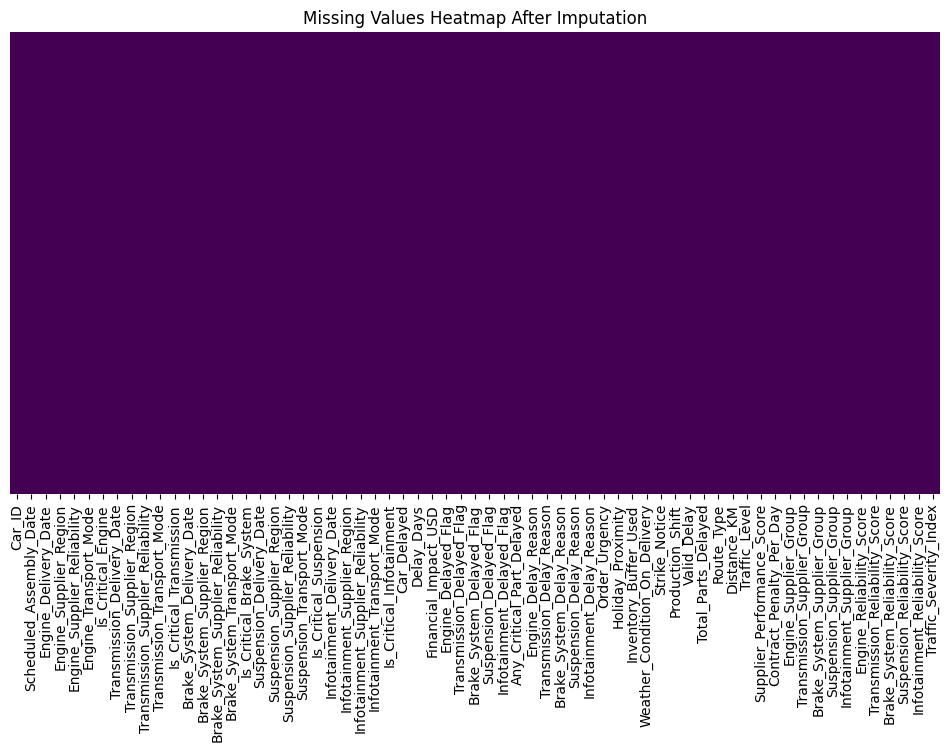

In [ ]:
# Check for any remaining missing values after filling
# A clean heatmap with no highlighted cells indicates successful imputation
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap After Imputation')
plt.show()

### Visualizing Missing Values with Heatmap

The heatmap above uses color coding to indicate missing values (`True` = missing, `False` = not missing).  
- Before imputation, columns with missing data show vertical lines of colored blocks.  
- After imputation, the heatmap should show no colored blocks, confirming all missing values have been handled.  

This quick visual check ensures data completeness before modeling.


## Step 8 Formatting Categorical Columns

In [ ]:
# Normalize categorical columns: uppercase + strip spaces for consistency
categorical_cols= df.select_dtypes(include=["object"])
for col in categorical_cols:
  df[col]= df[col].str.upper().str.strip()

# Outlier Detection and Handling

## Step 9 Outlier Detection Strategy

Before handling outliers, we carefully filtered our numeric columns to avoid false flags or meaningless corrections.

### Step 1: All Numeric Columns Identified


In [ ]:
#getting the numerical columns from the dataset
numeric_columns= df.select_dtypes(include=["float64", "int64"]).columns.tolist()
numeric_columns

['Engine_Supplier_Reliability',
 'Is_Critical_Engine',
 'Transmission_Supplier_Reliability',
 'Is_Critical_Transmission',
 'Brake_System_Supplier_Reliability',
 'Is_Critical_Brake_System',
 'Suspension_Supplier_Reliability',
 'Is_Critical_Suspension',
 'Infotainment_Supplier_Reliability',
 'Is_Critical_Infotainment',
 'Car_Delayed',
 'Delay_Days',
 'Financial_Impact_USD',
 'Engine_Delayed_Flag',
 'Transmission_Delayed_Flag',
 'Brake_System_Delayed_Flag',
 'Suspension_Delayed_Flag',
 'Infotainment_Delayed_Flag',
 'Any_Critical_Part_Delayed',
 'Holiday_Proximity',
 'Inventory_Buffer_Used',
 'Strike_Notice',
 'Total_Parts_Delayed',
 'Distance_KM',
 'Supplier_Performance_Score',
 'Contract_Penalty_Per_Day',
 'Engine_Reliability_Score',
 'Transmission_Reliability_Score',
 'Brake_System_Reliability_Score',
 'Suspension_Reliability_Score',
 'Infotainment_Reliability_Score',
 'Traffic_Severity_Index']


### Step 2: Remove Columns Not Relevant for Outlier Analysis

| Column Type | Reason for Exclusion |
|-------------|-----------------------|
| Binary Flags (`0`/`1`) | Not continuous – outliers don’t apply |
| Bounded Counts | Typically have limited, safe value ranges |
| Target Columns | Not used for this phase |

Excluded columns:
 'Is_Critical_Engine',
 'Is_Critical_Transmission',
 'Is_Critical_Brake_System',
 'Is_Critical_Suspension',,
 'Is_Critical_Infotainment',Car_Delayed',Engine_Delayed_Flag',
 'Transmission_Delayed_Flag',
 'Brake_System_Delayed_Flag',
 'Suspension_Delayed_Flag',
 'Infotainment_Delayed_Flag',Car_Delayed, Any_Critical_Part_Delayed, Holiday_Proximity, Inventory_Buffer_Used, Strike_Notice, Total_Parts_Delayed'




### Step 3: Final Outlier Columns (Continuous, Business-Relevant)

We focus only on continuous variables that hold business value and are likely to affect downstream model performance or business KPIs:

- `Delay_Days`
- `Financial_Impact_USD`
- `Engine_Supplier_Reliability`
- `Transmission_Supplier_Reliability`
- `Brake_System_Supplier_Reliability`
- `Suspension_Supplier_Reliability`
- `Infotainment_Supplier_Reliability`


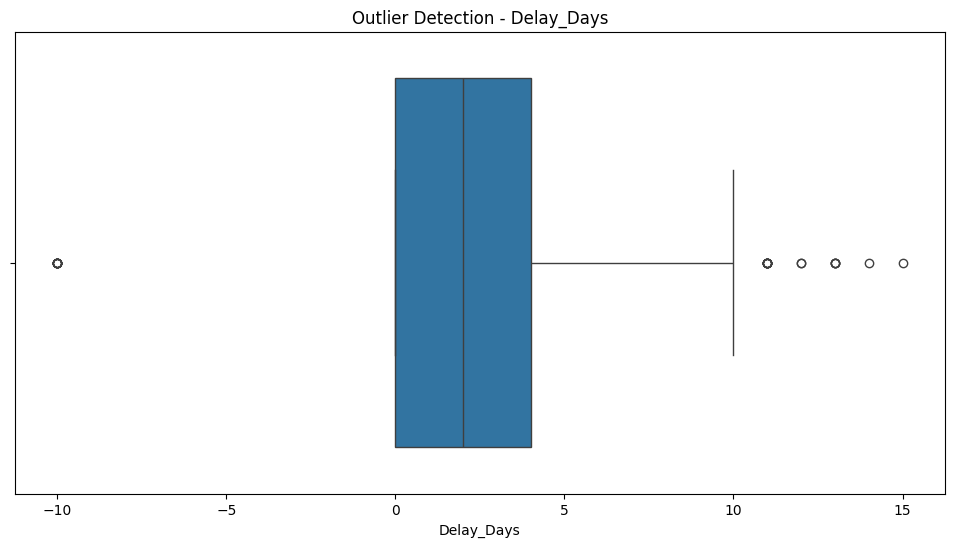

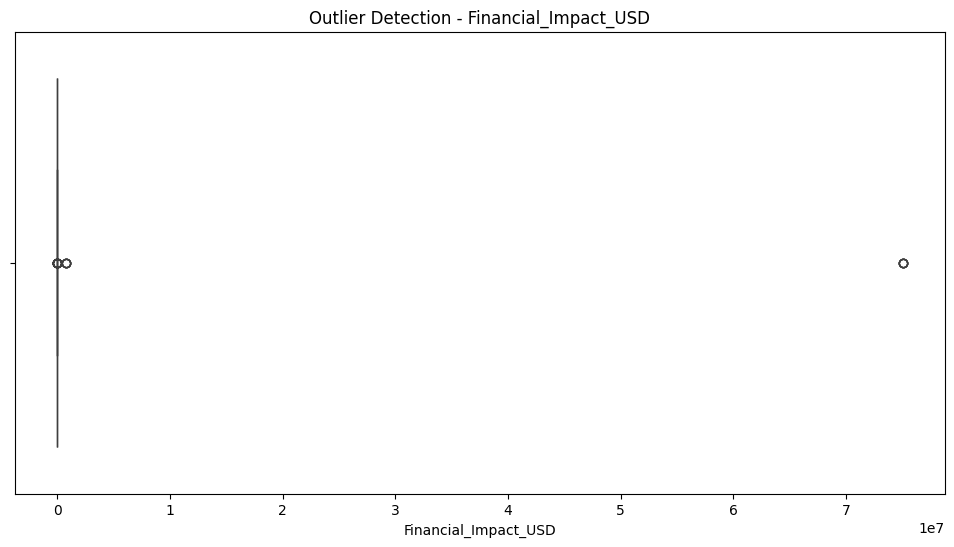

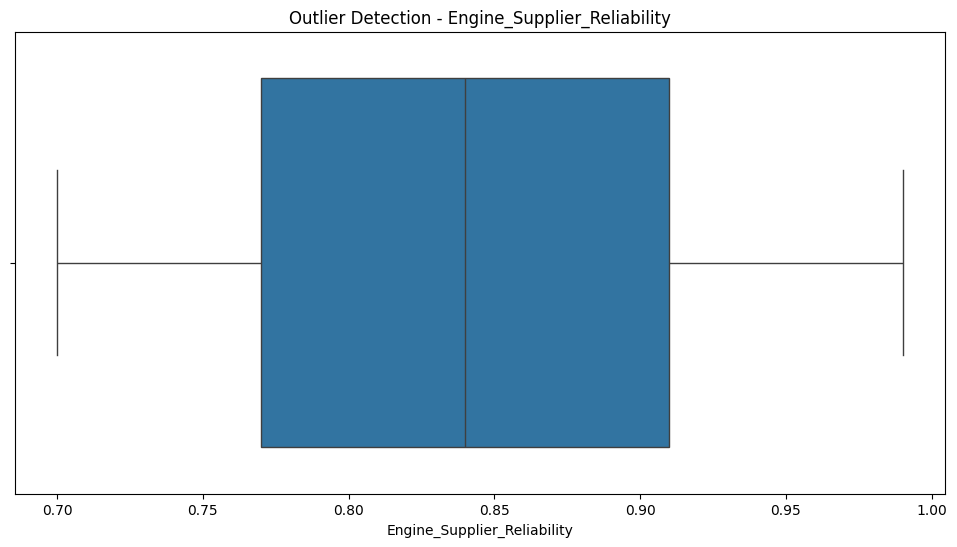

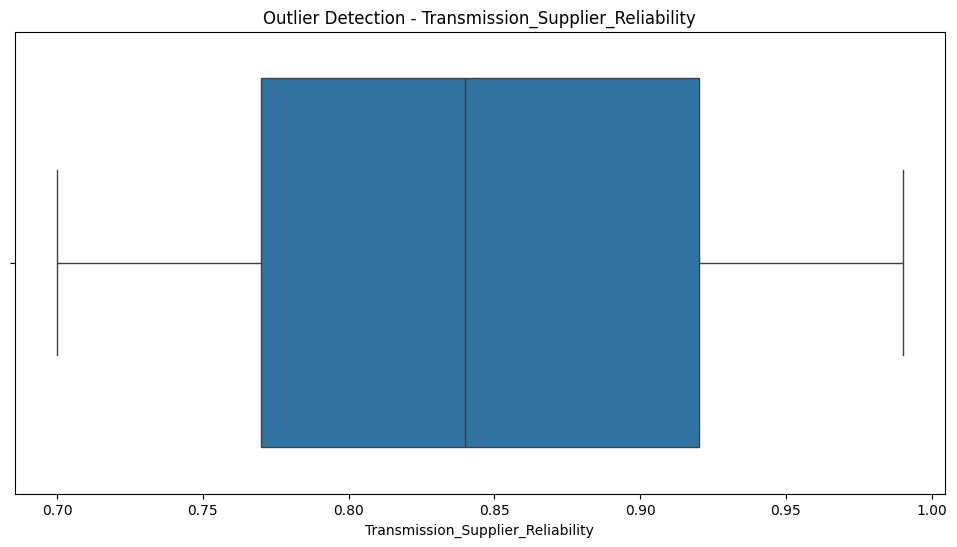

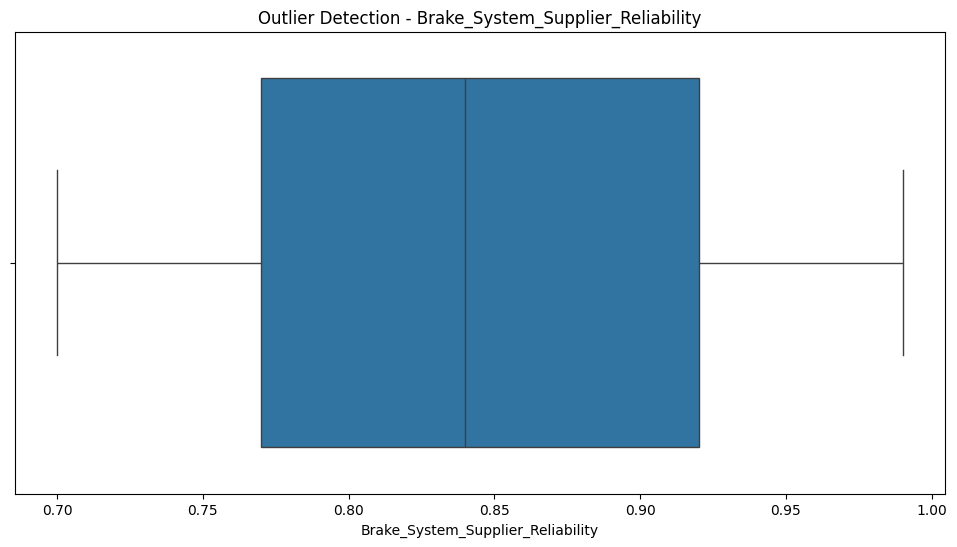

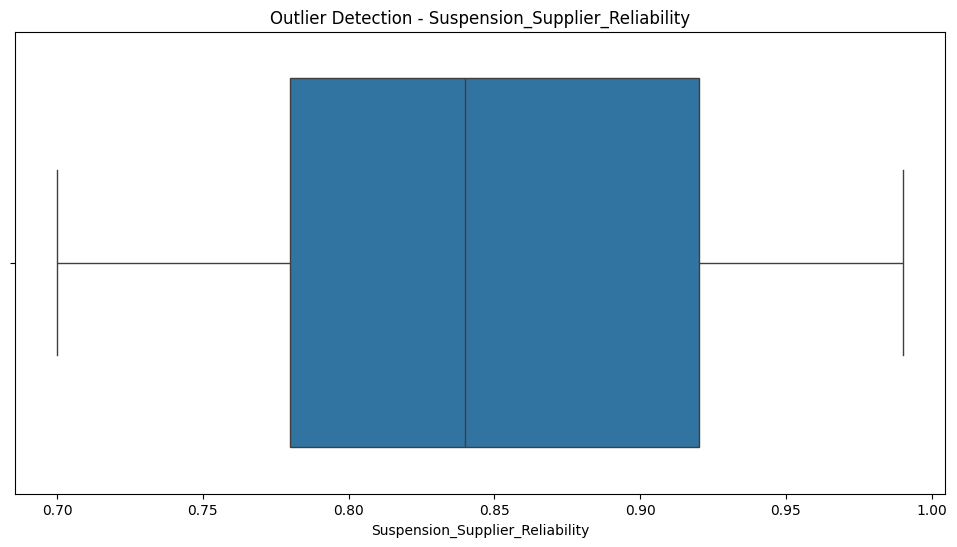

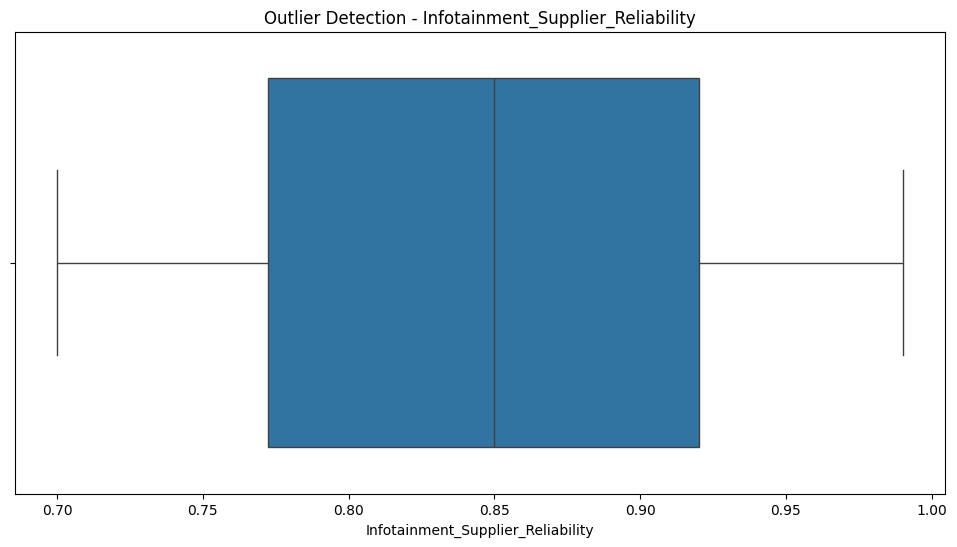

In [ ]:
#plotting boxplots for each column to check outliers
outlier_cols=["Delay_Days", "Financial_Impact_USD", "Engine_Supplier_Reliability", "Transmission_Supplier_Reliability", "Brake_System_Supplier_Reliability", "Suspension_Supplier_Reliability", "Infotainment_Supplier_Reliability"]
for col in outlier_cols:
  plt.figure(figsize=(12,6))
  sns.boxplot(x= df[col])
  plt.title(f"Outlier Detection - {col}")
  plt.xlabel(col)
  plt.show()

In [ ]:
# correcting delay_days negative values
df["Delay_Days"]=df["Delay_Days"].apply(lambda x: 0 if x<0 else x)
# Cap 'Delay_Days' values above 95th percentile to limit extreme outliers
cap_value= df["Delay_Days"].quantile(0.95)
df["Delay_Days"]= np.where(df["Delay_Days"]>cap_value, cap_value, df["Delay_Days"])

In [ ]:
# Cap 'Financial_Impact_USD' values above 95th percentile to limit extreme outliers
cap_value = df['Financial_Impact_USD'].quantile(0.95)
df['Financial_Impact_USD'] = np.where(df['Financial_Impact_USD'] > cap_value,cap_value,df['Financial_Impact_USD'])


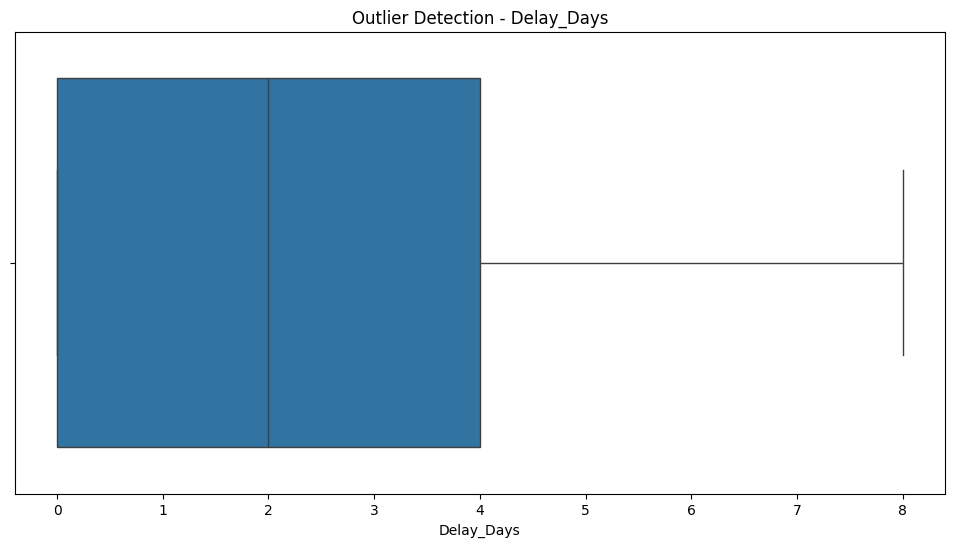

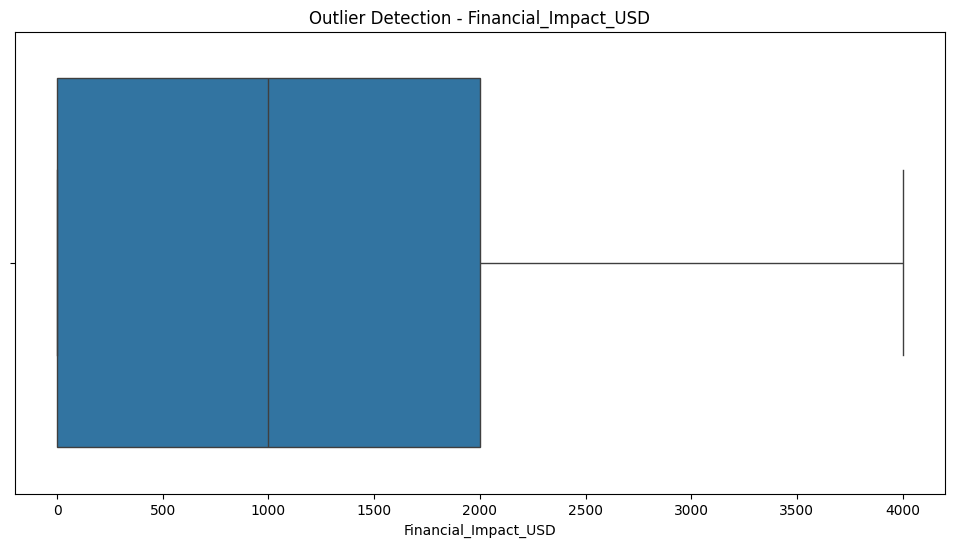

In [ ]:
# Check for any remaining outliers after filling
# A clean boxplot indicates successful imputation
outlier_cols=["Delay_Days", "Financial_Impact_USD"]
for col in outlier_cols:
  plt.figure(figsize=(12,6))
  sns.boxplot(x= df[col])
  plt.title(f"Outlier Detection - {col}")
  plt.show()

### Outlier Detection and Treatment Summary

- Negative delay days were corrected to zero because negative delay is invalid.
- Extreme delay days and financial impact values were capped at the 95th percentile to limit influence of outliers.
- This reduces skew and potential bias in machine learning models without losing data.


In [ ]:
# Calculate the total number of missing values across the dataset.
# A value of zero confirms that all missing data has been addressed.
df.isnull().sum().sum()

np.int64(0)

In [ ]:
# Display dataset summary including data types and non-null counts.
# Confirms correct data formatting and completeness post-cleaning.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 65 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Car_ID                             1010 non-null   object        
 1   Scheduled_Assembly_Date            1010 non-null   datetime64[ns]
 2   Engine_Delivery_Date               1010 non-null   datetime64[ns]
 3   Engine_Supplier_Region             1010 non-null   object        
 4   Engine_Supplier_Reliability        1010 non-null   float64       
 5   Engine_Transport_Mode              1010 non-null   object        
 6   Is_Critical_Engine                 1010 non-null   int64         
 7   Transmission_Delivery_Date         1010 non-null   datetime64[ns]
 8   Transmission_Supplier_Region       1010 non-null   object        
 9   Transmission_Supplier_Reliability  1010 non-null   float64       
 10  Transmission_Transport_Mode        1

In [ ]:
## Verify that all duplicate records have been successfully removed.
# Ensures data quality by preventing bias from repeated entries.
df.duplicated().sum()

np.int64(0)

## Conclusion

The dataset has been thoroughly cleaned and preprocessed:

- Duplicates removed to ensure unique records
- Data types converted appropriately for dates and categorical data
- Missing values imputed thoughtfully using domain knowledge and statistics
- Categorical columns standardized to uppercase and stripped of spaces (optional if not done)
- Outliers in key numeric columns handled by capping at 95th percentile
- Dataset now has no missing values, consistent formatting, and is ready for feature engineering and modeling

Next steps include feature engineering and building predictive models for shipment delay and financial impact.


##Step 10 Save the Cleaned dataset

In [ ]:
#saving the cleaned dataset for Exploratory Data Analysis
df.to_csv("Cleaned_car_automated_dataset.csv", index=False)

##  Final Dataset Summary

| Metric                        | Before Cleaning | After Cleaning |
|------------------------------|-----------------|----------------|
| Total Rows                   | 1010          | 1010          |
| Total Columns                | 55           | 55            |
| Missing Values               | 3000+           | 0              |
| Invalid Delay_Days Corrected | Yes             | Yes (Negatives set to 0, capped at 95th percentile) |
| Financial Impact Outliers    | Capped          | Yes (at 95th percentile) |

The cleaned dataset is now saved as `Cleaned_car_automated_dataset.csv` and is fully ready for EDA, feature engineering, and machine learning.
